In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor,StackingRegressor

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error

import joblib

In [28]:
data = pd.read_csv('dataset.txt')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [12]:
data.head(2)

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990


# EDA - Univariate Categorical Feature Analysis

In [6]:
data['Name'] = data['Name'].apply(lambda x:x.split(' ')[1])
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.slice(0,4)

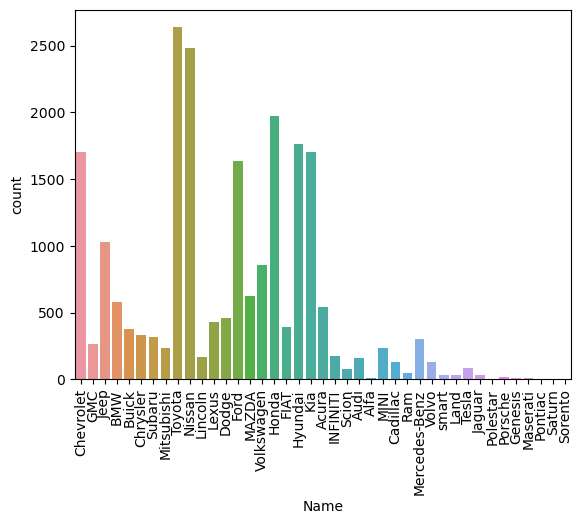

In [7]:
a = sns.countplot(x=data['Name'])
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

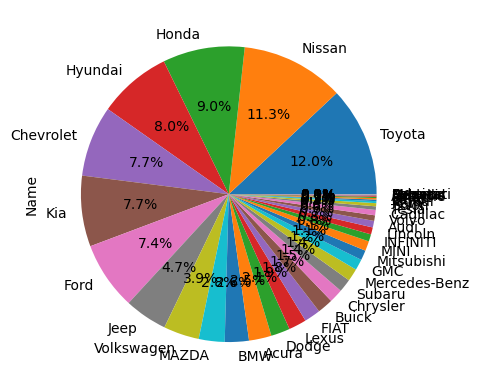

In [8]:
a = data['Name'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

# Univariate Numerical Feature Analysis

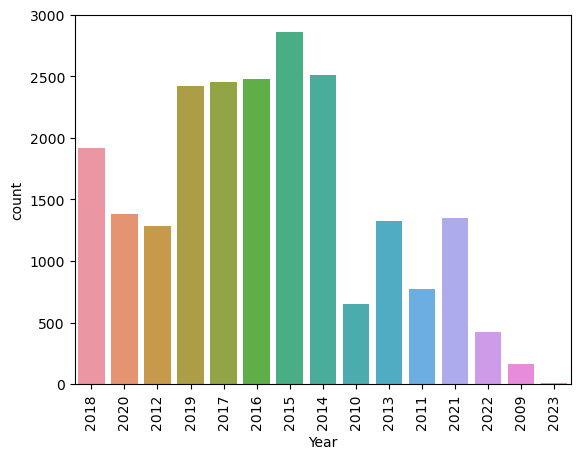

In [9]:
a = sns.countplot(x=data['Year'])
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

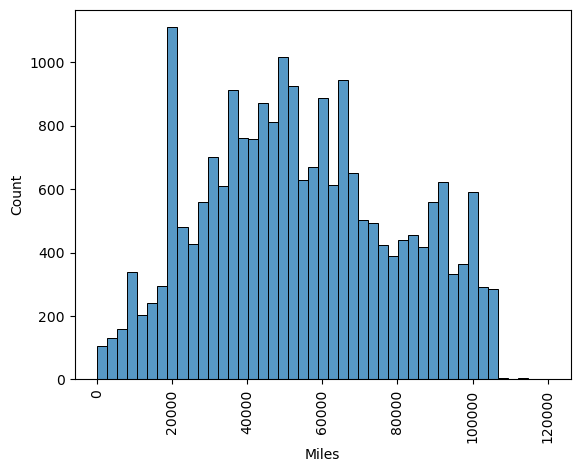

In [10]:
a = sns.histplot(x=data['Miles'])
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

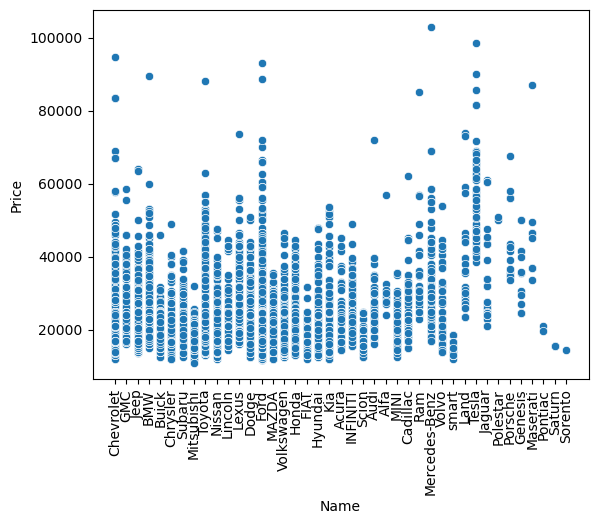

In [11]:
a= sns.scatterplot(x=data['Name'] , y=data['Price'])
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()


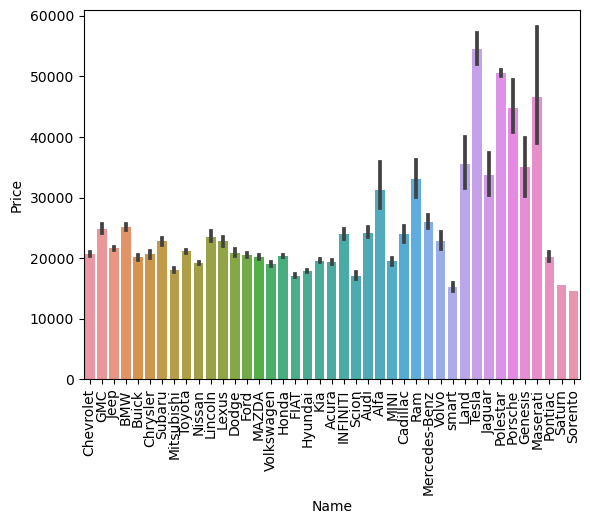

In [12]:
a= sns.barplot(x=data['Name'] , y=data['Price'])
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

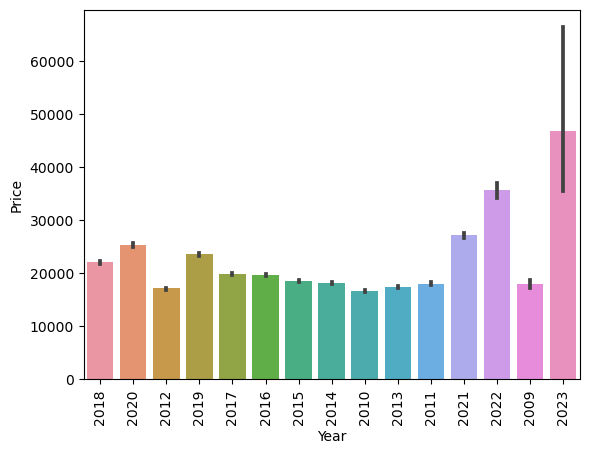

In [13]:
a=sns.barplot(x= data['Year'] ,y=data['Price'] )
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

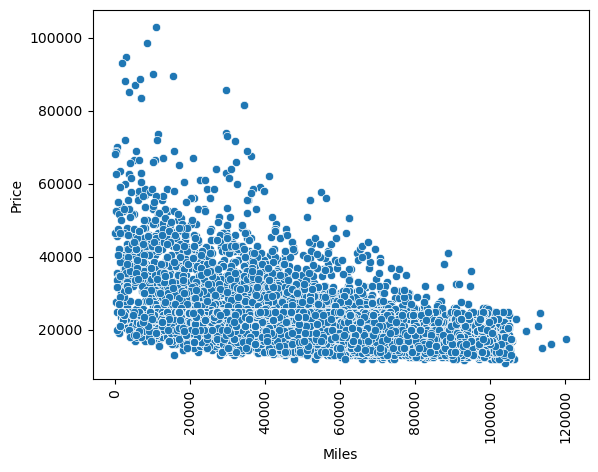

In [14]:
a= sns.scatterplot(x=data['Miles'] , y=data['Price'])
plt.setp(a.get_xticklabels(),rotation = 90)
plt.show()

In [15]:
pd.crosstab(data['Name'],data['Year'])

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Name,,,,,,,,,,,,,,,
Acura,0,184,8,241,17,15,22,16,20,6,9,1,3,0,0
Alfa,0,0,0,0,0,0,0,1,3,2,7,0,0,0,0
Audi,0,3,13,10,28,17,21,22,28,9,2,2,1,2,0
BMW,8,7,180,16,36,72,83,52,32,43,22,12,11,5,0
Buick,0,2,11,23,13,34,11,66,71,55,49,19,19,4,0
Cadillac,0,11,3,11,17,18,24,6,15,5,4,15,0,0,0
Chevrolet,7,4,36,56,70,115,258,198,326,138,170,141,165,19,1
Chrysler,0,14,4,8,26,24,53,60,45,16,14,14,47,6,0
Dodge,0,5,0,2,25,31,59,73,46,81,90,28,14,3,0


# MultiVariate Analysis

In [16]:
data.corr()

,Miles,Price
Miles,1.000000,-0.474124
Price,-0.474124,1.000000


<Axes: >

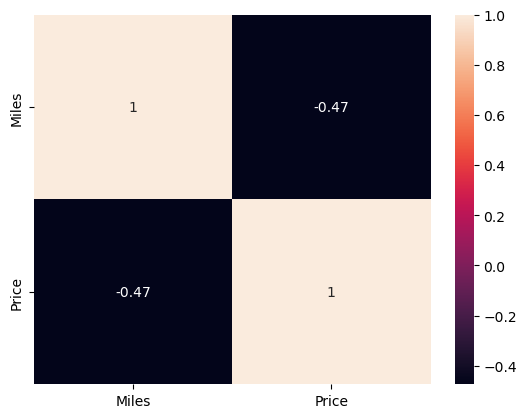

In [17]:
sns.heatmap(data.corr(),annot = True)

# PipeLining:

In [13]:
class CustomTransformer_cat(BaseEstimator, TransformerMixin): 
    def __init__(self):
        #print('\n>>>>>>>init() called.\n')
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X['Name'] = X['Name'].apply(lambda x:x.split(' ')[1])
        X['Year'] = X['Year'].astype(str)
        X['Year'] = X['Year'].str.slice(0,4)
        return X

In [18]:
categorical_custom_transformer = Pipeline([
    ('custom transformer for categorical data',CustomTransformer_cat())
])


In [19]:
categorical_preprocesing = Pipeline([
    ('categorical imputing',SimpleImputer(strategy='most_frequent')),
    ('categorical encoding',OneHotEncoder(handle_unknown='ignore',sparse= False))
])
numerical_preprocessing = Pipeline([
    ('numerical imputing',SimpleImputer(strategy='mean')),
    ('numerical scaling',MinMaxScaler())
])

In [20]:
categorical_final = Pipeline([
    ('custom preprocessing',categorical_custom_transformer),
    ('categorical preprocessing',categorical_preprocesing )
])

In [21]:
Final_preprocessing = ColumnTransformer(
transformers = [
    ('Categorical',categorical_final,['Name', 'Year']),
    ('Numerical',numerical_preprocessing,['Miles'])
])

# Model Building

In [22]:
Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree=2)),
    ('model',RandomForestRegressor())
])

In [23]:
x= data.drop(columns = ['Price'])
y= data['Price']

In [24]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=30)

# Model Fiting

In [25]:
Package.fit(train_x,train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('custom '
                                                                   'preprocessing',
                                                                   Pipeline(steps=[('custom '
                                                                                    'transformer '
                                                                                    'for '
                                                                                    'categorical '
                                                                                    'data',
                                                                                    CustomTransformer_cat())])),
                                                                  ('categorical '
                                                                   'preprocessing',
                                                                   Pipeline(steps=[('categorical '
                                                                                    'imputing',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('categorical '
                                                                                    'encoding',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Name', 'Year']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('numerical '
                                                                   'imputing',
                                                                   SimpleImputer()),
                                                                  ('numerical '
                                                                   'scaling',
                                                                   MinMaxScaler())]),
                                                  ['Miles'])])),
                ('Polynomial', PolynomialFeatures()),
                ('model', RandomForestRegressor())])

In [27]:
joblib.dump(Package,'package.pkl')

['package.pkl']

# Prediction and Evaluation:

In [30]:
train_y_pred = Package.predict(train_x)
test_y_pred = Package.predict(test_x)

In [31]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    print (' Mean Square Error value : {}\n Root Mean Square Error Value :{}\n Mean Absolute Error :{}\n Mean Absolute Percentage Error : {}\n R2 score :{}'.format(mse,rmse,mae,mape,r2))


In [32]:
print("Error Metrics for Train Data:")
Error_Metrics(train_y,train_y_pred)
print("Error Metrics for Test Data:")
Error_Metrics(test_y,test_y_pred)

Error Metrics for Train Data:
 Mean Square Error value : 1698767.1518730463
 Root Mean Square Error Value :1303.3676196196707
 Mean Absolute Error :529.7438352696357
 Mean Absolute Percentage Error : 0.02220491158321583
 R2 score :0.9595933711098857
Error Metrics for Test Data:
 Mean Square Error value : 12514941.062300859
 Root Mean Square Error Value :3537.6462601991257
 Mean Absolute Error :1420.0989100997235
 Mean Absolute Percentage Error : 0.05898171367566076
 R2 score :0.7242744603432196


# Model Selection (Without Parameter Tuning)

In [45]:
models = {
    'Linear':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'Decision':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'Ada':AdaBoostRegressor(),
    'GB':GradientBoostingRegressor()
    #'Voting':VotingRegressor(estimators=[('GB',)),
    #'Stacking':StackingRegressor()
}

In [46]:
res = []
for name,model in models.items():
    print("Model :",name)
    Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree=2)),
    ('model',model)
])
    Package.fit(train_x,train_y)
    train_y_pred = Package.predict(train_x)
    test_y_pred = Package.predict(test_x)
    train_r2_score = r2_score(train_y,train_y_pred)
    test_r2_score = r2_score(test_y,test_y_pred)
    print('Train Score :',train_r2_score)
    print('Test Score :',test_r2_score)
    res.append([name,train_r2_score,test_r2_score])
res = pd.DataFrame(res,columns = ['Model','TrainScore','TestScore'])
res['Variation'] = res['TrainScore']-res['TestScore']
res = res.sort_values(['Variation'])
print(res)

Model : Linear
Train Score : 0.665087753993606
Test Score : -9.403669564313251e+21
Model : KNN
Train Score : 0.7633739720529222
Test Score : 0.6362667646127498
Model : Decision
Train Score : 0.99994508935455
Test Score : 0.6290187773961863
Model : RF
Train Score : 0.9599573733080187
Test Score : 0.7239305972225119
Model : Ada
Train Score : -0.02685785528322371
Test Score : 0.028790813048356623
Model : GB
Train Score : 0.6136323528617261
Test Score : 0.5668770221925441
      Model  TrainScore     TestScore     Variation
4       Ada   -0.026858  2.879081e-02 -5.564867e-02
5        GB    0.613632  5.668770e-01  4.675533e-02
1       KNN    0.763374  6.362668e-01  1.271072e-01
3        RF    0.959957  7.239306e-01  2.360268e-01
2  Decision    0.999945  6.290188e-01  3.709263e-01
0    Linear    0.665088 -9.403670e+21  9.403670e+21


# Finding K Value for KNN Algorithm:

In [47]:
res = []
for i in range(1,50):
    Package = Pipeline([
    ('Preprocessing',Final_preprocessing),
    ('Poly',PolynomialFeatures(degree=2)),
    ('model',KNeighborsRegressor(n_neighbors = i))
])
    Package.fit(train_x,train_y) 
    predict_y = Package.predict(train_x)
    res.append(r2_score(train_y,predict_y))

<Axes: >

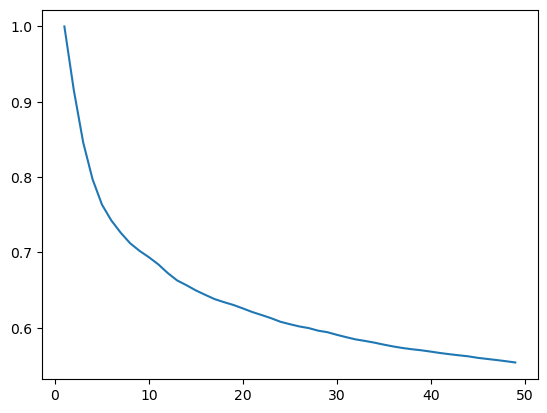

In [48]:
pd.Series(res,index = range(1,50)).plot()

# Parameter Tuning: (only for RF)

In [ ]:
res = []
#for name,model in models.items():
    #print("Model :",name)
Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree=2)),
    ('Random',RandomForestRegressor())
])
param = {
        'Random__n_estimators' : [100,120,140,160],
        'Random__max_depth':[13,15]
    }
grid  = GridSearchCV(estimator=Package,param_grid=param,)
grid.fit(train_x,train_y)
train_y_pred = grid.predict(train_x)
test_y_pred = grid.predict(test_x)
best = grid.best_params_
print('Best Params:',best)
train_r2_score = r2_score(train_y,train_y_pred)
test_r2_score = r2_score(test_y,test_y_pred)
print('Train Score :',train_r2_score)
print('Test Score :',test_r2_score)
res.append([train_r2_score,test_r2_score])
res = pd.DataFrame(res,columns = ['TrainScore','TestScore'])
res['Variation'] = res['TrainScore']-res['TestScore']
res = res.sort_values(['Variation'])
print(res)